## Data Preparation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

### Reading the Dataset

In [2]:
df = pd.read_csv('Amazon Sale Report.csv')


### Converting Date to datetime format

In [3]:
df['Date'] = pd.to_datetime(df['Date'], format='%m-%d-%y', errors='coerce')

### Checking for missing values

In [4]:
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 index                      0
Order ID                   0
Date                   55109
Status                     0
Fulfilment                 0
Sales Channel              0
ship-service-level         0
Category                   0
Size                       0
Courier Status             0
Qty                        0
currency                7800
Amount                  7800
ship-city                 35
ship-state                35
ship-postal-code          35
ship-country              35
B2B                        0
fulfilled-by           89713
New                   128976
PendingS              128976
dtype: int64


### Dropping rows with Nan values in critical columns

In [5]:
df.dropna(subset=['Date', 'Amount'], inplace=True)

### Conversion of Amount to numeric format

In [6]:
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')


### Fill or drop remaining missing values as appropriate

In [7]:
df.fillna({'fulfilled-by': 'Unknown', 'ship-city': 'Unknown', 'ship-state': 'Unknown'}, inplace=True)

## Sales Overview

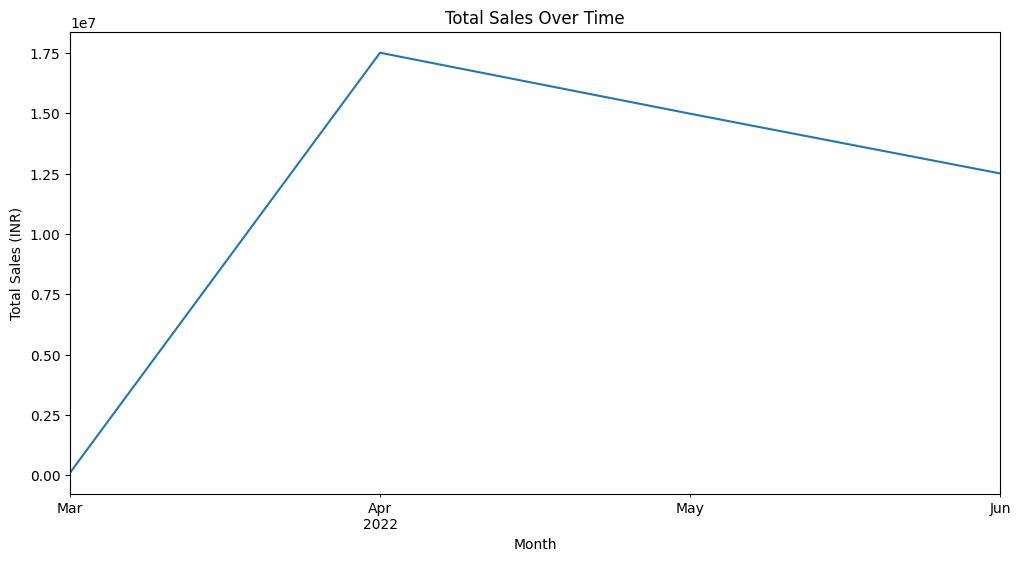

In [8]:
# Total sales over time
df['Month'] = df['Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Amount'].sum()

# Plot total sales over time
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line')
plt.title('Total Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales (INR)')
plt.show()


## Product Analysis

### Category Distribution

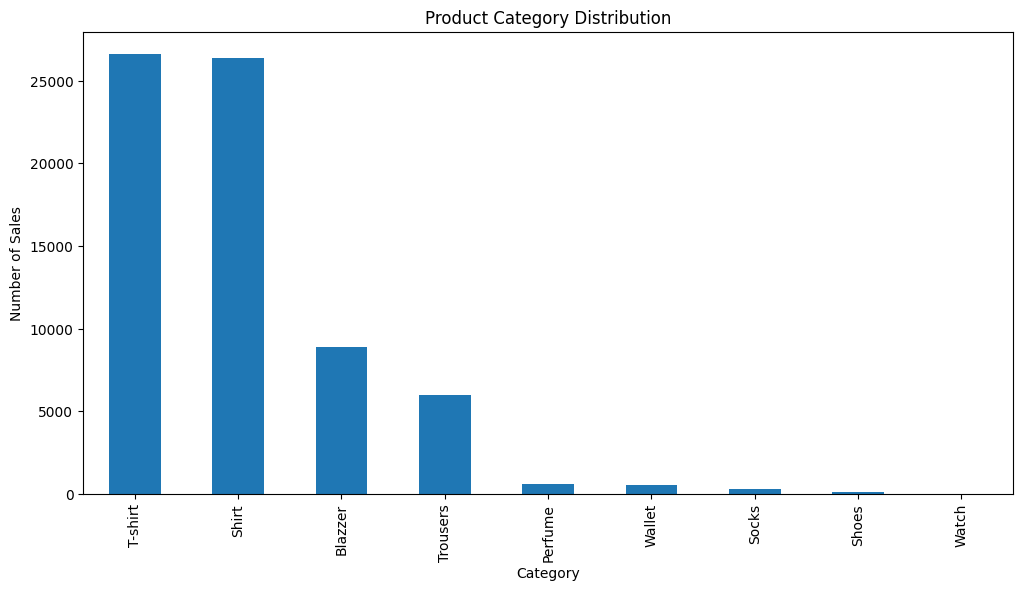

In [9]:

category_distribution = df['Category'].value_counts()

plt.figure(figsize=(12, 6))
category_distribution.plot(kind='bar')
plt.title('Product Category Distribution')
plt.xlabel('Category')
plt.ylabel('Number of Sales')
plt.show()

### Size Distribution

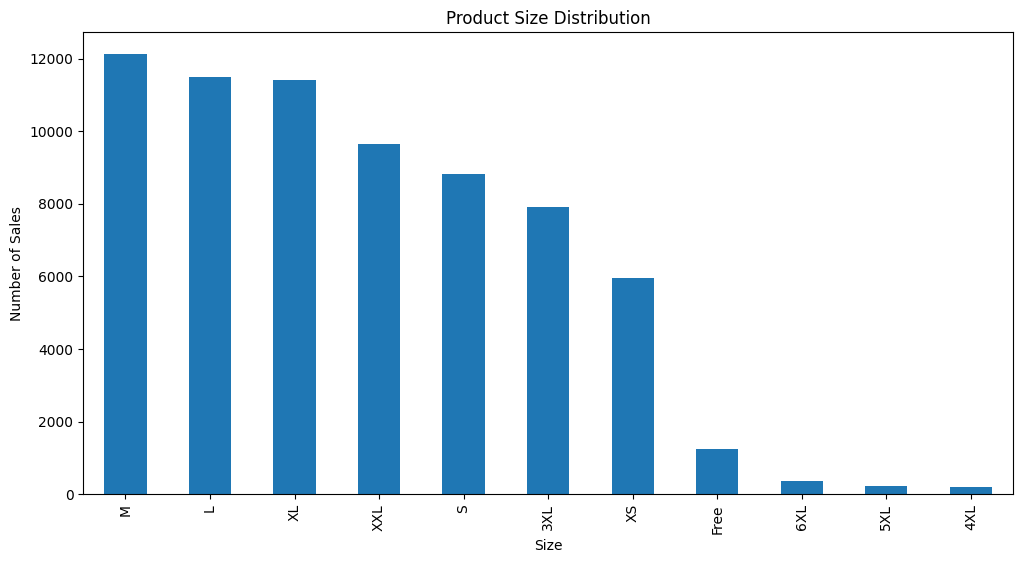

In [10]:
size_distribution = df['Size'].value_counts()

plt.figure(figsize=(12, 6))
size_distribution.plot(kind='bar')
plt.title('Product Size Distribution')
plt.xlabel('Size')
plt.ylabel('Number of Sales')
plt.show()

## Fulfillment Analysis

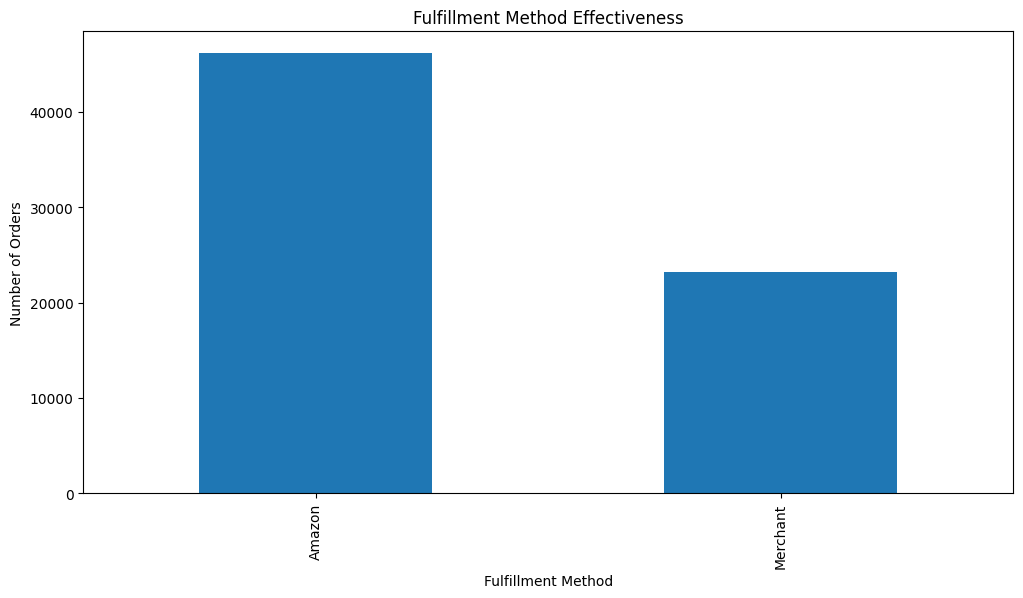

In [11]:

fulfillment_effectiveness = df['Fulfilment'].value_counts()


plt.figure(figsize=(12, 6))
fulfillment_effectiveness.plot(kind='bar')
plt.title('Fulfillment Method Effectiveness')
plt.xlabel('Fulfillment Method')
plt.ylabel('Number of Orders')
plt.show()


## Customer Segmentation

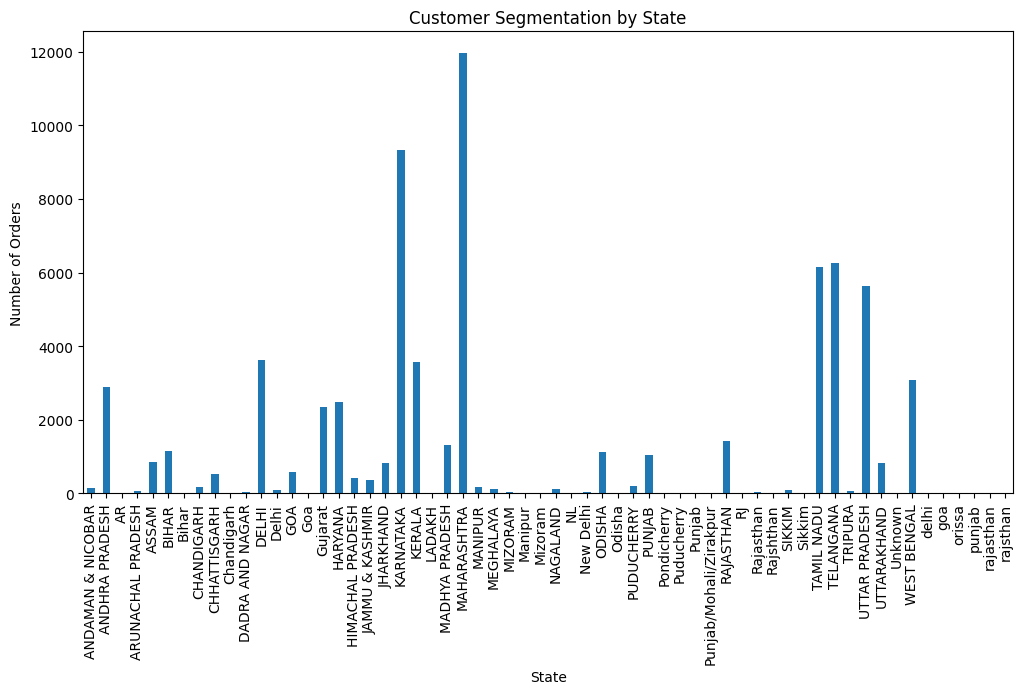

In [12]:
location_segmentation = df.groupby(['ship-state'])['Order ID'].count()

plt.figure(figsize=(12, 6))
location_segmentation.plot(kind='bar')
plt.title('Customer Segmentation by State')
plt.xlabel('State')
plt.ylabel('Number of Orders')
plt.show()


## Geographical Analysis

### Sales by State

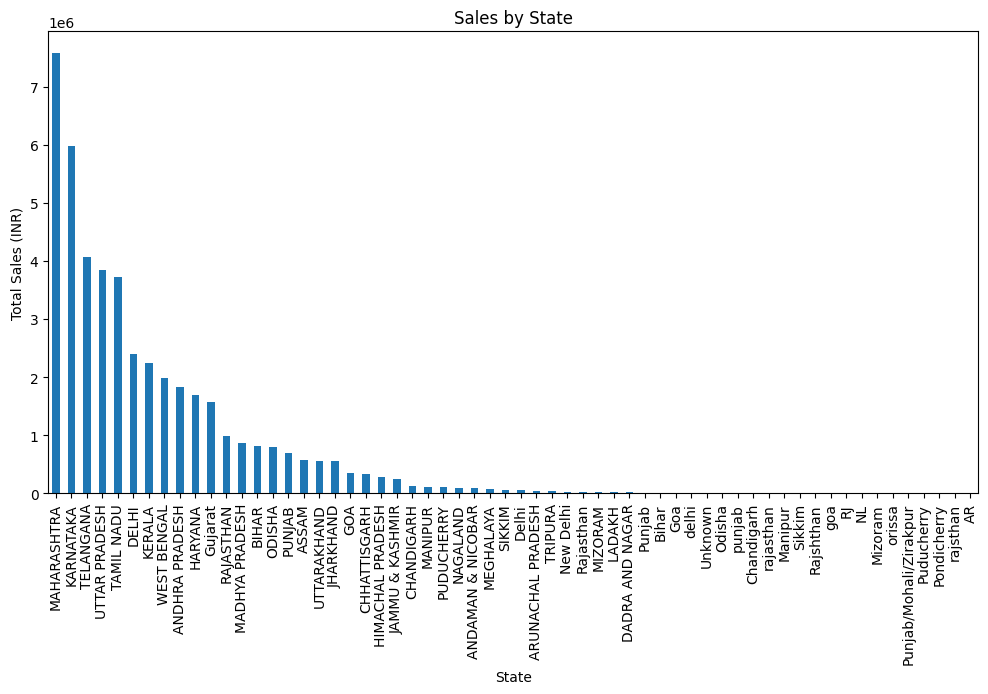

In [13]:

state_sales = df.groupby('ship-state')['Amount'].sum().sort_values(ascending=False)


plt.figure(figsize=(12, 6))
state_sales.plot(kind='bar')
plt.title('Sales by State')
plt.xlabel('State')
plt.ylabel('Total Sales (INR)')
plt.show()




### Sales by City

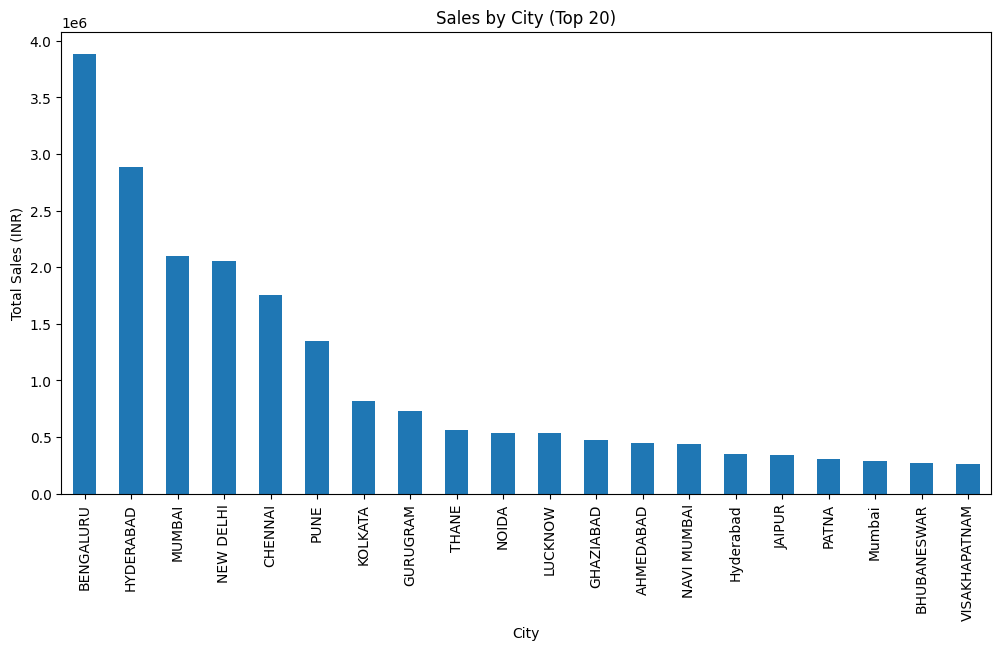

In [14]:

city_sales = df.groupby('ship-city')['Amount'].sum().sort_values(ascending=False).head(20)  # Top 20 cities


plt.figure(figsize=(12, 6))
city_sales.plot(kind='bar')
plt.title('Sales by City (Top 20)')
plt.xlabel('City')
plt.ylabel('Total Sales (INR)')
plt.show()


## Business Insights and Recommendations

In [15]:
# Summarize key findings
sales_overview_summary = {
    'total_sales': df['Amount'].sum(),
    'average_order_value': df['Amount'].mean(),
    'total_orders': df['Order ID'].nunique()
}

# Provide actionable insights
recommendations = {
    'optimize_inventory': 'Focus on high-selling categories and sizes.',
    'improve_fulfillment': 'Evaluate and improve the effectiveness of different fulfillment methods.',
    'targeted_marketing': 'Use customer segmentation data to run targeted marketing campaigns.'
}

print("Sales Overview Summary:\n", sales_overview_summary)
print("\nRecommendations:\n", recommendations)


Sales Overview Summary:
 {'total_sales': np.float64(45113639.79000001), 'average_order_value': np.float64(649.9026130863202), 'total_orders': 64579}

Recommendations:
 {'optimize_inventory': 'Focus on high-selling categories and sizes.', 'improve_fulfillment': 'Evaluate and improve the effectiveness of different fulfillment methods.', 'targeted_marketing': 'Use customer segmentation data to run targeted marketing campaigns.'}
